# Generating Graphs and Tables for My Results

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd

## Plotting models onto the ROC space

C:\Users\jacob\AppData\Local\Temp\ipykernel_31664\3987050448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['Model'][7] = 'ResNet152_7_0.5_2017'
C:\Users\jacob\AppData\Local\Temp\ipykernel_31664\3987050448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['Model'][6] = 'ResNet152_6_0.5_2018'


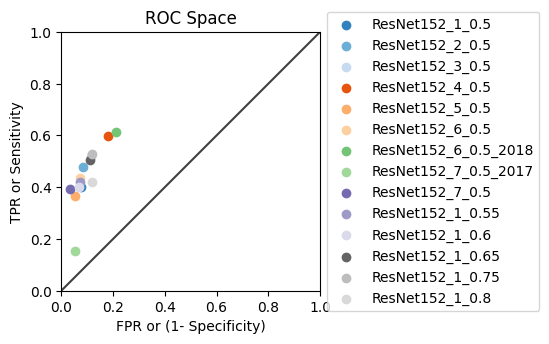

In [8]:
#set up plotting areac= [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

metrics = pd.read_csv('classification_metrics.csv')
metrics['Model'][7] = 'ResNet152_7_0.5_2017'
metrics['Model'][6] = 'ResNet152_6_0.5_2018'
fig, ax = plt.subplots()
colormap = cm.get_cmap('tab20c', len(metrics))  # Get a colormap
for index, row in metrics.iterrows():
    color = colormap(index / len(metrics))
    plt.scatter((1-row['Specificity']), row['Recall'], label=row['Model'],color= color)
#ax.scatter((1-metrics['Specificity']), metrics['Recall'],c=c, s=25, cmap=plt.cm.coolwarm, zorder=10)
#print(metrics.head)
#metrics2 = metrics[['Specificity','Recall']]
#metrics2.loc['Specificity'] = 1- metrics2['Specificity']
#metrics2.plot(x=['Specificity'],y=['Recall'],kind='scatter',xlim=(0,1),ylim=(0,1))
#add legend

#plt.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=len(metrics)), cmap=colormap)) 
ax.plot([0,1], [0,1], 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel("FPR or (1- Specificity)")
ax.set_ylabel("TPR or Sensitivity")
ax.set_title("ROC Space")
ax.set_xlim([0,1])
ax.set_ylim([0,1])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
fig.savefig('ROC', dpi=600)


## Generating latex tables from our .csv files

In [94]:
metrics = pd.read_csv('classification_metrics.csv')
metrics.to_latex('classification_metrics.txt',index = False)

C:\Users\jacob\AppData\Local\Temp\ipykernel_19772\664181449.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  metrics.to_latex('classification_metrics.txt',index = False)


In [93]:
metrics = pd.read_csv('mask_metrics.csv')
metrics.to_latex('mask_metrics.txt',index = False)

C:\Users\jacob\AppData\Local\Temp\ipykernel_19772\67788341.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  metrics.to_latex('mask_metrics.txt',index = False)
